## 第104讲 SVM Kernels 及手工验证实现Polynomial Kernels

## Python学习：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

## Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

Support Vector Machines perform classification by finding linear decision boundaries that are as far away from the data as possible. They work great with linearly separable data but fail miserably otherwise.

To make non-linear data linearly separable (and thus convenient for SVMs) we can add more features to the data since in a higher-dimensional space the probability of the data being linearly separable increases.

Two popular types of new features to add are polynomial combinations of existing features (polynomial features) and observation-wise distances from landmarks, i.e. some reference values (similarity features).

Actually adding them might slow the model down to the extent of making it useless.

The kernel trick is a smart maneuver that takes advantage of some mathematical properties in order to deliver the same results as though we have added additional features without actually adding them.

The polynomial and RBF kernels (pretend to) add the polynomial and similarity features, respectively.

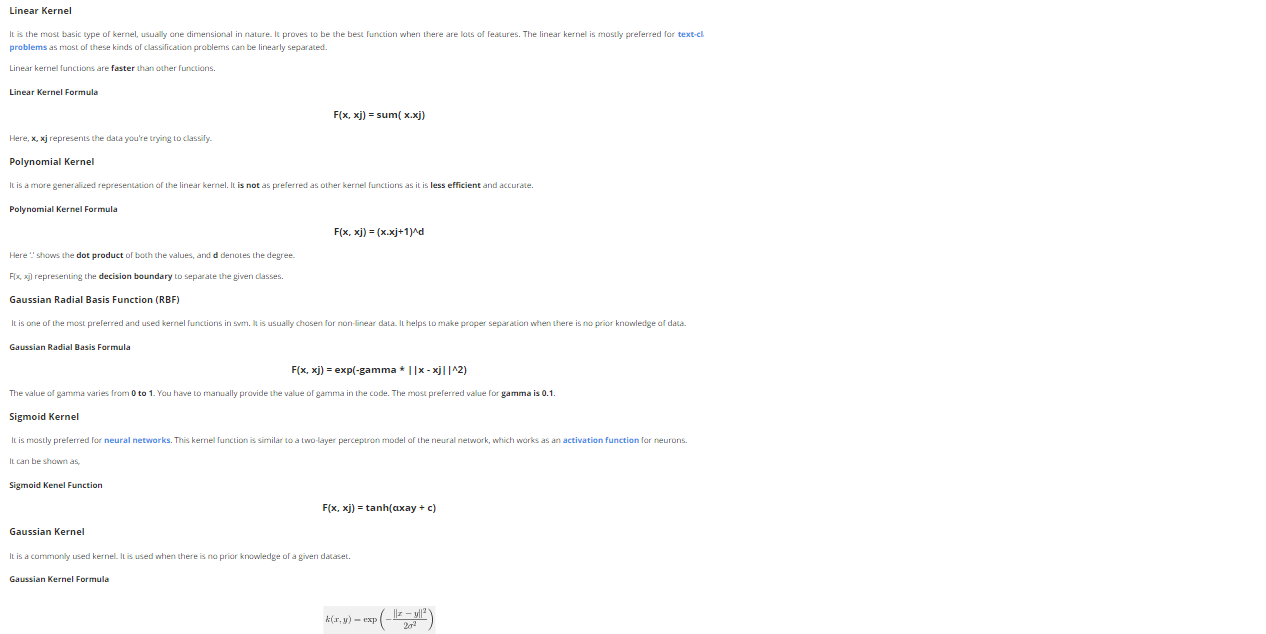

In [1]:
from IPython.display import Image
Image(filename='D:\python\Interview-Prepartion-Data-Science-master\Lesson104-3.png')

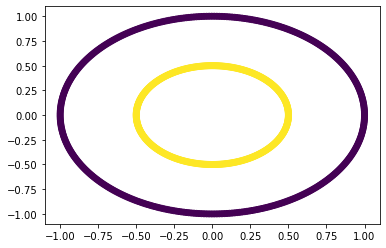

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=750, factor=0.5, noise=0)
plt.scatter(X[:,0], X[:,1], c=y)

In [22]:
X

array([[-0.99407532, -0.10869338],
       [-0.4854201 ,  0.87428103],
       [ 0.41646062, -0.27669577],
       ...,
       [-0.87224005,  0.48907801],
       [ 0.8681122 ,  0.49636803],
       [-0.99407532,  0.10869338]])

In [23]:
y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [24]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
y_train

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [26]:
X_train

array([[-0.9971589 ,  0.07532681],
       [-0.02094242,  0.99978068],
       [-0.4890738 , -0.10395585],
       ...,
       [ 0.5       ,  0.        ],
       [ 1.        ,  0.        ],
       [-0.49984209,  0.01256505]])

In [33]:
from sklearn.svm import SVC
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.6914893617021277

## 手工验证实现Polynomial Kernels

In [35]:
X

array([[-0.99407532, -0.10869338],
       [-0.4854201 ,  0.87428103],
       [ 0.41646062, -0.27669577],
       ...,
       [-0.87224005,  0.48907801],
       [ 0.8681122 ,  0.49636803],
       [-0.99407532,  0.10869338]])

In [36]:
import pandas as pd
df =pd.DataFrame(X,columns=['X1','X2'])
df['y']=pd.DataFrame(y,columns=['y'])
df.head(5)

,X1,X2,y
0,-0.994075,-0.108693,0
1,-0.485420,0.874281,0
2,0.416461,-0.276696,1
3,0.193758,-0.460932,1
4,0.356412,-0.934329,0


In [37]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,y,X1_Square,X2_Square,X1*X2
0,-0.994075,-0.108693,0,0.988186,0.011814,0.108049
1,-0.485420,0.874281,0,0.235633,0.764367,-0.424394
2,0.416461,-0.276696,1,0.173439,0.076561,-0.115233
3,0.193758,-0.460932,1,0.037542,0.212458,-0.089309
4,0.356412,-0.934329,0,0.127029,0.872971,-0.333006


In [38]:
### Independent and Dependent features
XX = df[['X1','X2','X1_Square','X2_Square','X1*X2']]

In [39]:
XX

,X1,X2,X1_Square,X2_Square,X1*X2
0,-0.994075,-0.108693,0.988186,0.011814,0.108049
1,-0.485420,0.874281,0.235633,0.764367,-0.424394
2,0.416461,-0.276696,0.173439,0.076561,-0.115233
3,0.193758,-0.460932,0.037542,0.212458,-0.089309
4,0.356412,-0.934329,0.127029,0.872971,-0.333006
...,...,...,...,...,...
745,0.224192,0.446921,0.050262,0.199738,0.100196
746,-0.903036,0.429566,0.815473,0.184527,-0.387913
747,-0.872240,0.489078,0.760803,0.239197,-0.426593
748,0.868112,0.496368,0.753619,0.246381,0.430903


In [40]:
y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XX, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [42]:
X_train1

,X1,X2,X1_Square,X2_Square,X1*X2
451,-0.997159,0.075327,0.994326,0.005674,-0.075113
236,-0.020942,0.999781,0.000439,0.999561,-0.020938
612,-0.489074,-0.103956,0.239193,0.010807,0.050842
77,0.469367,-0.172321,0.220305,0.029695,-0.080882
354,-0.499982,0.004189,0.249982,0.000018,-0.002094
...,...,...,...,...,...
707,0.563814,0.825902,0.317887,0.682113,0.465655
192,-0.227928,0.445027,0.051951,0.198049,-0.101434
629,0.500000,0.000000,0.250000,0.000000,0.000000
559,1.000000,0.000000,1.000000,0.000000,0.000000


In [43]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='y')
fig.show()

In [44]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2',
              color='y')
fig.show()

In [45]:
classifier = SVC(kernel="linear")
classifier.fit(X_train1, y_train1)
y_pred1 = classifier.predict(X_test1)
accuracy_score(y_test1, y_pred1)

1.0

In [46]:
classifier = SVC(kernel="poly")
classifier.fit(X_train1, y_train1)
y_pred1 = classifier.predict(X_test1)
accuracy_score(y_test1, y_pred1)

1.0